# Data Science - Practice

El cliente Stark Industries se ha planteado el objetivo de mejorar sus contrataciones.
Dentro de sus principales problemas, Stark Industries identifica la rotación de personal, es decir, los
colaboradores que abandonan la compañía. Stark Industries ha recolectado algunos datos para poder
comprender mejor el fenómeno de la rotación de personal.

Objetivo general

Comprobar si con los datos obtenidos se puede identificar si un empleado dejara o no la empresa.

Dataset:
turnover.csv

### Glosario del dataset

<ul>
    <li>stag : Experiencia (tiempo).</li>
    <li>event : Deserción de trabajo (1: Abandona, 0: Se queda).</li>
    <li>gender : Feminino(f), Másculino(m).</li>
    <li>age : Edad del empleado (años).</li>
    <li>industry : Industria del empleado.</li>
    <li>profession : Profesión del empleado.</li>
    <li>traffic : Si el empleado vino por recomendación, paginas, etc.</li>
    <li>coach : Presencia de un entrenador en el periodo de prueba (No,Yes,My head).</li>
    <li>head gender : Sexo del supervisor.</li>
    <li>greywage : White(salario mínimo) /Grey (pequeña cantidad por encima del mínimo).</li>
    <li>way : Tranporte para ir a trabajar.</li>
    <li>extraversion : extraversión</li>
    <li>independ -> agreeableness : simpatía</li>
    <li>selfcontrol -> conscientiousness : escrupulosidad</li>
    <li>anxiety -> neuroticism : neuroticismo</li>
    <li>novator -> openness : franqueza</li>
</ul>

> Nota: Se utiliza la traducción especificada para las columnas independ, selfcontrol, anxiety y novator

## 1.- Recolectar datos

In [6]:
# Importar las librerías necesarias para la obtención y visualización de los datos
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [8]:
# Lectura de datos desde el archivo csv, en caso de que el archivo no tenga la codificación por defecto revisar cual es la apropiada.
data = pd.read_csv("turnover.csv", encoding='ISO-8859-1')

# Revisando los datos
data.head()

,stag,event,gender,age,industry,profession,traffic,coach,head_gender,greywage,way,extraversion,independ,selfcontrol,anxiety,novator
0,7.030801,1,m,35.0,Banks,HR,rabrecNErab,no,f,white,bus,6.2,4.1,5.7,7.1,8.3
1,22.965092,1,m,33.0,Banks,HR,empjs,no,m,white,bus,6.2,4.1,5.7,7.1,8.3
2,15.934292,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,6.2,6.2,2.6,4.8,8.3
3,15.934292,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,5.4,7.6,4.9,2.5,6.7
4,8.410678,1,m,32.0,Retail,Commercial,youjs,yes,f,white,bus,3.0,4.1,8.0,7.1,3.7


In [9]:
# Tamaño del dataset
data.shape

(1129, 16)

### 1.1.- Limpieza de datos

In [10]:
# Renombramos columnas
data = data.rename(columns={"independ": "agreeableness", "selfcontrol": "conscientiousness", "anxiety": "neuroticism", "novator": "openness"})

data.head()

,stag,event,gender,age,industry,profession,traffic,coach,head_gender,greywage,way,extraversion,agreeableness,conscientiousness,neuroticism,openness
0,7.030801,1,m,35.0,Banks,HR,rabrecNErab,no,f,white,bus,6.2,4.1,5.7,7.1,8.3
1,22.965092,1,m,33.0,Banks,HR,empjs,no,m,white,bus,6.2,4.1,5.7,7.1,8.3
2,15.934292,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,6.2,6.2,2.6,4.8,8.3
3,15.934292,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,5.4,7.6,4.9,2.5,6.7
4,8.410678,1,m,32.0,Retail,Commercial,youjs,yes,f,white,bus,3.0,4.1,8.0,7.1,3.7


In [11]:
# Revisamos si existen valores nulos, en caso de existir valores nulos aplicar alguna tecnica para trabajar con ellos.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1129 entries, 0 to 1128
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   stag               1129 non-null   float64
 1   event              1129 non-null   int64  
 2   gender             1129 non-null   object 
 3   age                1129 non-null   float64
 4   industry           1129 non-null   object 
 5   profession         1129 non-null   object 
 6   traffic            1129 non-null   object 
 7   coach              1129 non-null   object 
 8   head_gender        1129 non-null   object 
 9   greywage           1129 non-null   object 
 10  way                1129 non-null   object 
 11  extraversion       1129 non-null   float64
 12  agreeableness      1129 non-null   float64
 13  conscientiousness  1129 non-null   float64
 14  neuroticism        1129 non-null   float64
 15  openness           1129 non-null   float64
dtypes: float64(7), int64(1),

In [12]:
# Verificar si hay datos faltantes por columna
data.isnull().any()

stag                 False
event                False
gender               False
age                  False
industry             False
profession           False
traffic              False
coach                False
head_gender          False
greywage             False
way                  False
extraversion         False
agreeableness        False
conscientiousness    False
neuroticism          False
openness             False
dtype: bool

Como no se tienen datos nulos se puede avanzar en el análisis para ver cómo se comportan.

## 2.- Análisis estadístico

Dentro de este análisis se podrán plantear hipótesis y a partir de los datos validarlas o refutarlas.<br>
<br>Hipótesis: 
<li>La edad (age) es un factor que influye en gran medida a la permanencia en el empleo.</li>
<li>La experiencia (stag) es un factor que afecta la permanencia en el empleo.</li>
<li>El tipo de sueldo (grey/white) es un factor que afecta la permanencia en el empleo.</li>
<li>Las variables extraversion, agreeableness, conscientiousness, neuroticism y openness son factores que deben tener un gran impacto en la permanencia/abandono del empleo.</li>

In [13]:
# Como se distribuyen las variables numericas
data.describe()

,stag,event,age,extraversion,agreeableness,conscientiousness,neuroticism,openness
count,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000
mean,36.627526,0.505757,31.066965,5.592383,5.478034,5.597254,5.665633,5.879628
std,34.096597,0.500188,6.996147,1.851637,1.703312,1.980101,1.709176,1.904016
min,0.394251,0.000000,18.000000,1.000000,1.000000,1.000000,1.700000,1.000000
25%,11.728953,0.000000,26.000000,4.600000,4.100000,4.100000,4.800000,4.400000
50%,24.344969,1.000000,30.000000,5.400000,5.500000,5.700000,5.600000,6.000000
75%,51.318275,1.000000,36.000000,7.000000,6.900000,7.200000,7.100000,7.500000
max,179.449692,1.000000,58.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [14]:
# Como se comportan las variables categoricas
data.describe(include=['object'])

,gender,industry,profession,traffic,coach,head_gender,greywage,way
count,1129,1129,1129,1129,1129,1129,1129,1129
unique,2,16,15,8,3,2,2,3
top,f,Retail,HR,youjs,no,m,white,bus
freq,853,289,757,318,683,584,1002,681


In [15]:
# Revisamos las relación entre las variables numéricas contra la columna “event”
data.groupby(['event']).mean()

,stag,age,extraversion,agreeableness,conscientiousness,neuroticism,openness
event,,,,,,,
0,38.294819,31.411829,5.563441,5.388710,5.677419,5.774910,5.866487
1,34.998191,30.729952,5.620665,5.565324,5.518914,5.558844,5.892469


In [16]:
# Revisamos la correlación existente entre las columnas numéricas contra la columna "event"
data.corrwith(data.event)

stag                -0.048361
event                1.000000
age                 -0.048751
extraversion         0.015458
agreeableness        0.051864
conscientiousness   -0.040040
neuroticism         -0.063232
openness             0.006825
dtype: float64

Se revisará de forma visual la relación entre las columnas para identificar que características son las más importantes para utilizar en el modelo.

In [17]:
categorical_cols = [col for col in data.columns if data[col].dtype == 'object']
numerical_cols = [col for col in data.columns if data[col].dtype != 'object']
print(f"Las columnas con valores categóricos son: {categorical_cols}")
print(f"Las columnas con valores numéricos son: {numerical_cols}")

Las columnas con valores categóricos son: ['gender', 'industry', 'profession', 'traffic', 'coach', 'head_gender', 'greywage', 'way']
Las columnas con valores numéricos son: ['stag', 'event', 'age', 'extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness']


### 2.1.- Revisión de variables numéricas

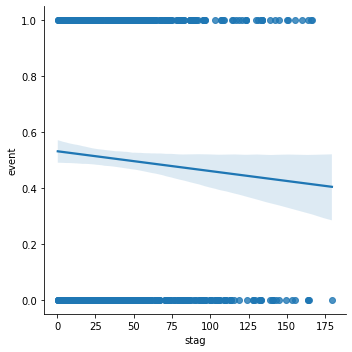

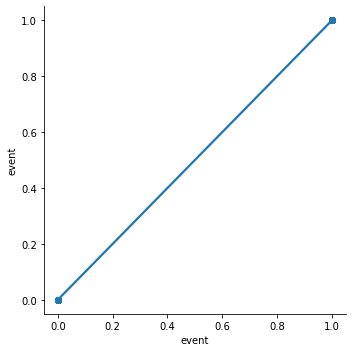

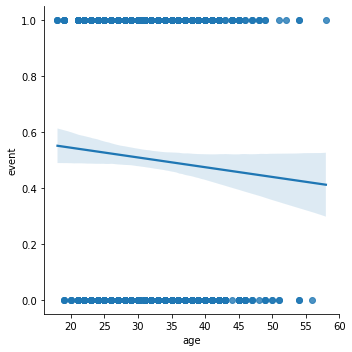

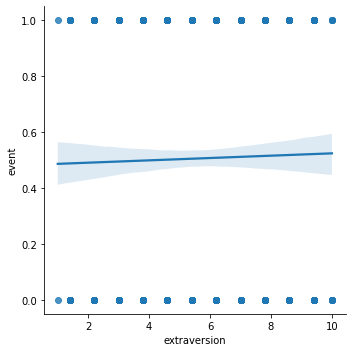

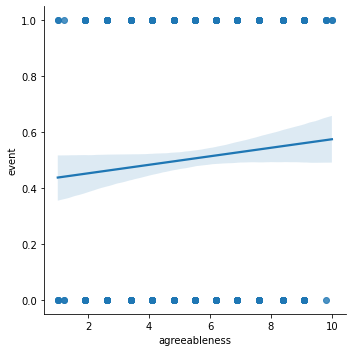

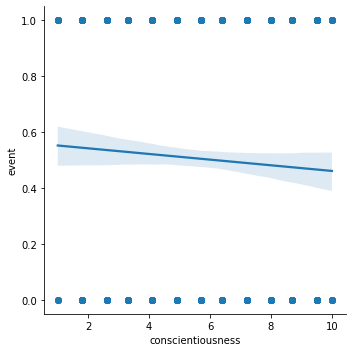

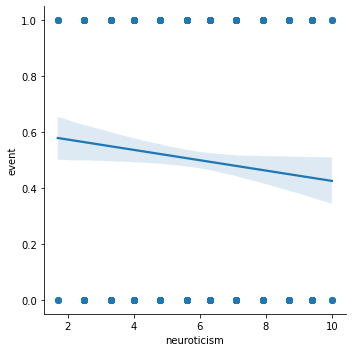

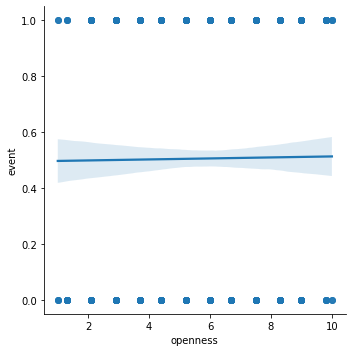

In [12]:
for col in numerical_cols:
    sns.lmplot(x=col, y='event', data=data)

A partir de las gráficas anteriores se puede obtener las siguientes conclusiones:
<li>Stag: Se aprecia una correlación negativa ya que mientras mayor sea la Experiencia, menor cantidad abandona.</li>
<li>Age: Se puede apreciar una correlación negativa ya que, a mayor Edad, menor cantidad abandona.</li>
<li>Extraversion: Se puede apreciar una correlación positiva, aunque es muy pequeña.</li>
<li>Agreeableness: Se puede apreciar una correlación positiva, ya que, a mayor simpatía, mayor es la cantidad que abandona.</li>
<li>Conscientiousness: Se aprecia una correlación negativa ya que mientras mayor sea la escrupulosidad, menor cantidad abandona.</li>
<li>Neuroticism: Se aprecia una correlación negativa ya que mientras mayor sea el neuroticismo, menor cantidad abandona.</li>
<li>Openness: Se puede apreciar una correlación positiva, aunque es muy pequeña.</li>
Con estas observaciones podemos notar que las variables Stag, Age, Agreeableness, Conscientiousness y Neuroticism son las que proveen información importante para utilizar en nuestro modelo.<br>
Las variables Extraversion y Openness no tienen un gran impacto en la permanencia/abandono del empleo, por lo que podemos prescindir de ellas para entrenar nuestro modelo.

### 2.2.- Revisión de variables categóricas

Para hacer más clara la relación entre las variables y el objetivo, se graficó los valores de forma normalizada.

In [13]:
def tablas_graficas(data, col):
    '''Funcion que grafica las caracteristicas categoricas '''
    for columna in col:
        tabla = pd.crosstab(index=data[columna],columns=data['event'], normalize="index")
        print(f"Tabulación cruzada de {columna}")
        print(tabla)
        tabla.plot.bar(subplots=False, figsize=(10, 5))
        plt.show()

Tabulación cruzada de gender
event          0         1
gender                    
f       0.488863  0.511137
m       0.510870  0.489130


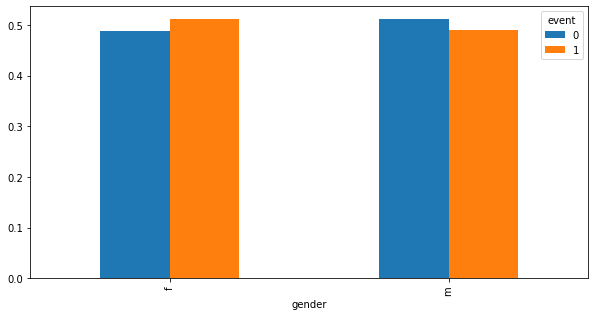

Tabulación cruzada de industry
event                   0         1
industry                           
 HoReCa          0.454545  0.545455
Agriculture      0.333333  0.666667
Banks            0.342105  0.657895
Building         0.243902  0.756098
Consult          0.391892  0.608108
IT               0.721311  0.278689
Mining           0.416667  0.583333
Pharma           0.450000  0.550000
PowerGeneration  0.605263  0.394737
RealEstate       0.615385  0.384615
Retail           0.529412  0.470588
State            0.363636  0.636364
Telecom          0.611111  0.388889
etc              0.425532  0.574468
manufacture      0.517241  0.482759
transport        0.578947  0.421053


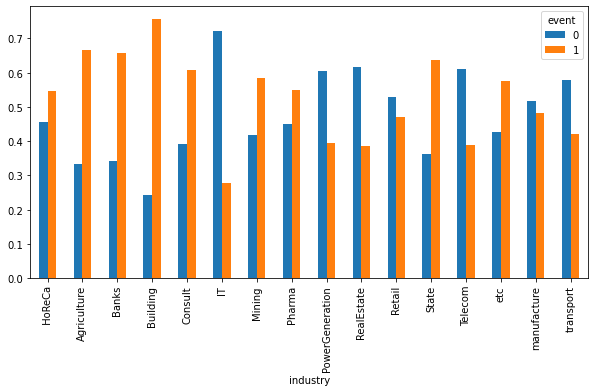

Tabulación cruzada de profession
event                       0         1
profession                             
Accounting           0.400000  0.600000
BusinessDevelopment  0.407407  0.592593
Commercial           0.347826  0.652174
Consult              0.360000  0.640000
Engineer             0.266667  0.733333
Finanñe              0.294118  0.705882
HR                   0.528402  0.471598
IT                   0.662162  0.337838
Law                  0.285714  0.714286
Marketing            0.322581  0.677419
PR                   0.166667  0.833333
Sales                0.469697  0.530303
Teaching             0.000000  1.000000
etc                  0.459459  0.540541
manage               0.318182  0.681818


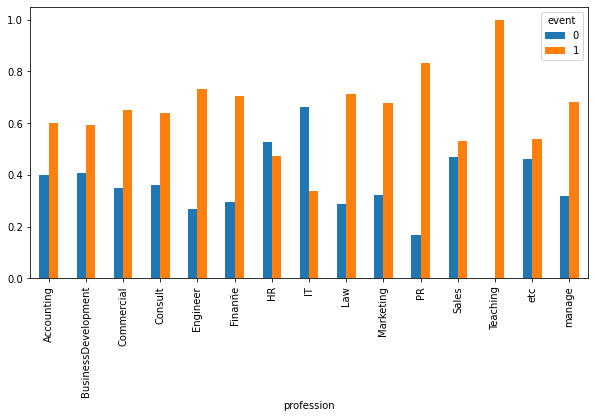

Tabulación cruzada de traffic
event               0         1
traffic                        
KA           0.462687  0.537313
advert       0.606061  0.393939
empjs        0.475806  0.524194
friends      0.644068  0.355932
rabrecNErab  0.398104  0.601896
recNErab     0.512821  0.487179
referal      0.336842  0.663158
youjs        0.556604  0.443396


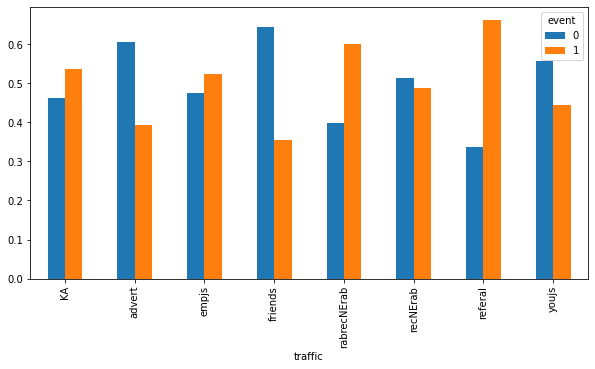

Tabulación cruzada de coach
event           0         1
coach                      
my head  0.538217  0.461783
no       0.486091  0.513909
yes      0.431818  0.568182


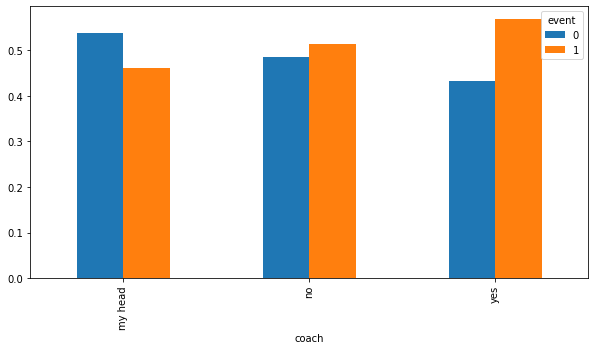

Tabulación cruzada de head_gender
event               0         1
head_gender                    
f            0.515596  0.484404
m            0.474315  0.525685


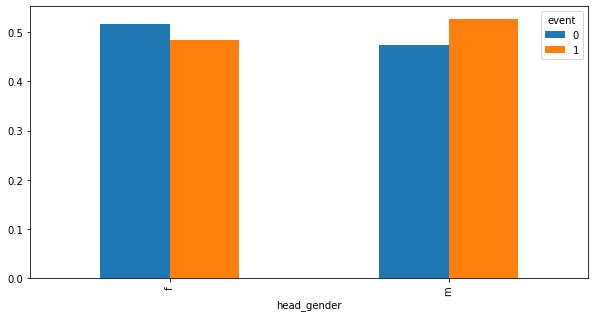

Tabulación cruzada de greywage
event            0         1
greywage                    
grey      0.425197  0.574803
white     0.502994  0.497006


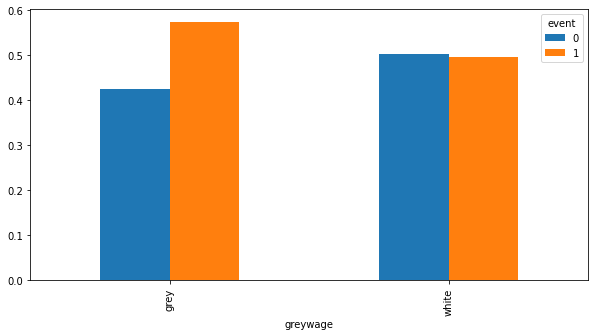

Tabulación cruzada de way
event         0         1
way                      
bus    0.480176  0.519824
car    0.474320  0.525680
foot   0.632479  0.367521


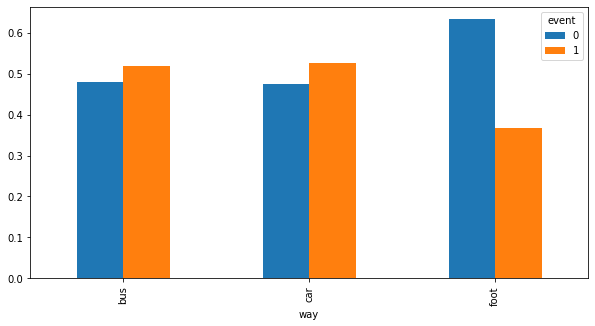

In [14]:
tablas_graficas(data, categorical_cols)

De las gráficas/tablas anteriores podemos obtener las siguientes conclusiones:
<li>Gender: Ya que los datos se encuentran muy similares se puede decir que el genero no afecta la permanencia/abandono del empleo.</li>
<li>Industry: Se puede notar una tendencia en ciertas industrias que si afectan la permanencia/abandono del empleo.</li>
<li>Profession: De igual forma se puede notar que ciertas profesiones tienen una mayor tendencia a la permanencia/abandono del empleo.</li>
<li>Traffic: Se aprecia que de acuerdo al tipo de referencia afecta la permanencia/abandono del empleo.</li>
<li>Coach: Al parecer no existe mucha diferencia entre tener o no coach para la permanencia/abandono del empleo.</li>
<li>Head gender: De igual forma no parece afectar en gran manera el género del supervisor.</li>
<li>Greywage: Este afecta cuando se trata del salario tipo Grey.</li>
<li>Way: Lo que se puede apreciar en la grafica es que este afecta cuando se habla de llegar al trabajo a pie.</li><br>
Por lo tanto, podemos descartar las variables gender y head_gender ya que estas tienen una repercusión mínima.


### 2.3.- Conclusiones del análisis estadístico
Con la información obtenida previamente se puede revisar el estado de nuestras hipótesis.
<li>En primer lugar, para la edad se observa que presenta una correlación negativa, lo que indica que a mayor edad, mayor permanencia, con lo que podemos concluir que la hipótesis es verdadera.</li>
<li>Se observa que para la experiencia (stag) tiene una correlación negativa, lo que quiere decir que mientras mas experiencia, mayor permanencia, con lo que se puede concluir que nuestra hipótesis es verdadera.</li>
<li>Se puede apreciar que en el caso del sueldo (greywage), este parece afectar solo cuando se habla de sueldo por arriba del mínimo, pero contrario a la hipótesis los datos indican que una mayor parte de los que tienen el sueldo tipo grey abandonan el empleo, por lo que la hipótesis es falsa (refutada).</li>
<li>Finalmente, nuestra hipótesis dice que las variables extraversion, agreeableness, conscientiousness, neuroticism y openness tienen un gran impacto en la permanencia/abandono del empleo y de acuerdo a la información que hemos obtenido la variable openness no tiene un impacto tan significativo ni en la permanencia ni en el abandono.</li>

## 3.- Machine learning
Ya se definió las caracteristicas que son utiles para entrenar el modelo y se puede notar que algunas de estas son del tipo categorico, para que se pueda entrenar el modelo se debe contar con valores numericos por lo que se debe realizar un tratamiento a los datos categoricos, existen diferentes propuestas para hacer esto, en este caso se utilizó el metodo One Hot Encoding.<br>
De igual forma se descartaron las variables que no aportan gran información para entrenar el modelo.
<br>
### 3.1.- Convertir los valores categoricos en numericos por el metodo One Hot Encoding y retirar las columnas que no utilizaremos

In [15]:
from sklearn.preprocessing import OneHotEncoder

oh_encoder = OneHotEncoder()
data_X = data.drop(['event','extraversion','openness'], axis=1)
data_y = data.event

categorical_cols = [col for col in categorical_cols if col not in ['gender',  'head_gender']]
categorical_cols = [col for col in data.columns if data[col].dtype == 'object']
oh_columns = oh_encoder.fit_transform(data_X[categorical_cols])
flat_categories = [item for l in oh_encoder.categories_ for item in l]
new_columns = pd.DataFrame(oh_columns.toarray(), columns=flat_categories)

data_X = data_X.drop(categorical_cols, axis=1)
data_X = pd.concat([data_X, new_columns],axis='columns')
print(data_X.head())

        stag   age  agreeableness  conscientiousness  neuroticism    f    m  \
0   7.030801  35.0            4.1                5.7          7.1  0.0  1.0   
1  22.965092  33.0            4.1                5.7          7.1  0.0  1.0   
2  15.934292  35.0            6.2                2.6          4.8  1.0  0.0   
3  15.934292  35.0            7.6                4.9          2.5  1.0  0.0   
4   8.410678  32.0            4.1                8.0          7.1  0.0  1.0   

    HoReCa  Agriculture  Banks  ...  my head   no  yes    f    m  grey  white  \
0      0.0          0.0    1.0  ...      0.0  1.0  0.0  1.0  0.0   0.0    1.0   
1      0.0          0.0    1.0  ...      0.0  1.0  0.0  0.0  1.0   0.0    1.0   
2      0.0          0.0    0.0  ...      0.0  1.0  0.0  0.0  1.0   0.0    1.0   
3      0.0          0.0    0.0  ...      0.0  1.0  0.0  0.0  1.0   0.0    1.0   
4      0.0          0.0    0.0  ...      0.0  0.0  1.0  1.0  0.0   0.0    1.0   

   bus  car  foot  
0  1.0  0.0   0.0 

Se dividió el dataset en el conjunto de datos que se utilizará para entrenar el modelo (train) y el conjunto de datos con el cual se validará la predicción (test).

In [16]:
# Divide data
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(data_X, data_y, train_size = 0.8, test_size= 0.2, random_state = 0)

Se creó una función en la cual se agrupó las métricas con las cuales se evaluará el desempeño de los modelos.
Dentro de las métricas se encuentra:
<li>Error absoluto medio</li>
<li>Puntaje de exactitud</li>
<li>Matriz de confusión</li>
<li>Precisión</li>
<li>Recall</li>
<li>F1</li>
<li>Reporte con las principales métricas de clasificación</li>
<li>Grafica de la matriz de confusión</li>

In [17]:
from sklearn.metrics import mean_absolute_error, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

def model_metrics(val, pred):
    print("MAE")
    print(mean_absolute_error(val, pred))
    print("Accuracy score")
    print(accuracy_score(val, pred))
    print("Matriz de confusion")
    print(confusion_matrix(val, pred))
    print("Precision")
    print(precision_score(val, pred))
    print("Recall")
    print(recall_score(val, pred))
    print("F1")
    print(f1_score(val, pred))
    print("Report")
    print(classification_report(val, pred))
    ConfusionMatrixDisplay.from_predictions(y_valid, preds)

### 3.2.- Selección de modelo
Al ser un problema de clasificacion, se cuenta con los siguientes modelos:
<li>Clasificador de bosque aleatorio (Random forest classifier)</li>
<li>Clasificador de árbol de decisión (Decision tree classifier)</li>
<li>Regresión logística (Logistic Regression)</li>
<li>Clasificación de vectores de soporte (Support Vector Classification)</li>
<li>K-Vecinos más cercanos (K-Nearest Neighbors)</li>
Todos los modelos serán entrenados y validados con los mismos conjuntos de dato y a través de las métricas obtenidas se seleccionará el mejor de ellos.

#### 3.2.1.- Clasificador de bosque aleatorio (Random forest classifier)

MAE
0.29646017699115046
Accuracy score
0.7035398230088495
Matriz de confusion
[[77 39]
 [28 82]]
Precision
0.6776859504132231
Recall
0.7454545454545455
F1
0.7099567099567099
Report
              precision    recall  f1-score   support

           0       0.73      0.66      0.70       116
           1       0.68      0.75      0.71       110

    accuracy                           0.70       226
   macro avg       0.71      0.70      0.70       226
weighted avg       0.71      0.70      0.70       226



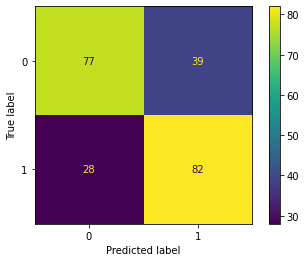

In [18]:
# Train the model
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=1000, random_state=0)
model.fit(X_train, y_train)
preds = model.predict(X_valid)
model_metrics(y_valid, preds)

#### 3.2.2.- Clasificador de árbol de decisión (Decision tree classifier)

MAE
0.3185840707964602
Accuracy score
0.6814159292035398
Matriz de confusion
[[79 37]
 [35 75]]
Precision
0.6696428571428571
Recall
0.6818181818181818
F1
0.6756756756756757
Report
              precision    recall  f1-score   support

           0       0.69      0.68      0.69       116
           1       0.67      0.68      0.68       110

    accuracy                           0.68       226
   macro avg       0.68      0.68      0.68       226
weighted avg       0.68      0.68      0.68       226



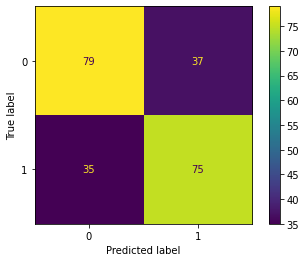

In [19]:
from sklearn.tree import DecisionTreeClassifier

model_tree = DecisionTreeClassifier()
model_tree.fit(X_train, y_train)
preds = model_tree.predict(X_valid)
model_metrics(y_valid, preds)

#### 3.2.3.- Regresión logística (Logistic Regression)

MAE
0.415929203539823
Accuracy score
0.584070796460177
Matriz de confusion
[[67 49]
 [45 65]]
Precision
0.5701754385964912
Recall
0.5909090909090909
F1
0.5803571428571428
Report
              precision    recall  f1-score   support

           0       0.60      0.58      0.59       116
           1       0.57      0.59      0.58       110

    accuracy                           0.58       226
   macro avg       0.58      0.58      0.58       226
weighted avg       0.58      0.58      0.58       226



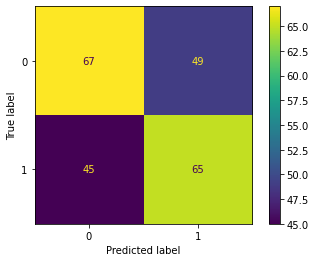

In [20]:
from sklearn.linear_model import LogisticRegression

model_log = LogisticRegression(max_iter=10000, C= 10)
model_log.fit(X_train, y_train)
preds = model_log.predict(X_valid)
model_metrics(y_valid, preds)

#### 3.2.4.- Clasificación de vectores de soporte (Support Vector Classification)

MAE
0.4336283185840708
Accuracy score
0.5663716814159292
Matriz de confusion
[[64 52]
 [46 64]]
Precision
0.5517241379310345
Recall
0.5818181818181818
F1
0.5663716814159292
Report
              precision    recall  f1-score   support

           0       0.58      0.55      0.57       116
           1       0.55      0.58      0.57       110

    accuracy                           0.57       226
   macro avg       0.57      0.57      0.57       226
weighted avg       0.57      0.57      0.57       226



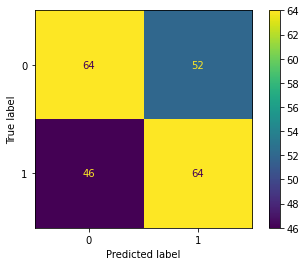

In [21]:
from sklearn.svm import SVC

model_svc = SVC(kernel='linear')
model_svc.fit(X_train, y_train)
preds = model_svc.predict(X_valid)
model_metrics(y_valid, preds)

#### 3.2.5.- K-Vecinos más cercanos (K-Nearest Neighbors)

MAE
0.40707964601769914
Accuracy score
0.5929203539823009
Matriz de confusion
[[95 21]
 [71 39]]
Precision
0.65
Recall
0.35454545454545455
F1
0.4588235294117647
Report
              precision    recall  f1-score   support

           0       0.57      0.82      0.67       116
           1       0.65      0.35      0.46       110

    accuracy                           0.59       226
   macro avg       0.61      0.59      0.57       226
weighted avg       0.61      0.59      0.57       226



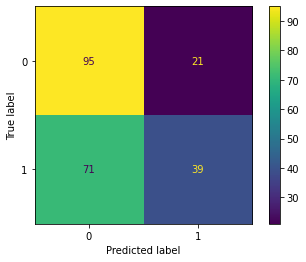

In [22]:
from sklearn import neighbors

model_knn = neighbors.KNeighborsClassifier(n_neighbors=2)
model_knn.fit(X_train, y_train)
preds = model_knn.predict(X_valid)
model_metrics(y_valid, preds)

## 4.- Evaluación del modelo

Como se puede observar el modelo que tiene el mejor comportamiento es el Clasificador de bosque aleatorio (Random forest classifier) por lo que se aplicará validación cruzada al mismo (cross-validation) y se obtendrá su curva ROC.

### 4.1.- Cross-Validation

In [23]:
from sklearn.model_selection import cross_val_score

cross_tree = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
print(cross_tree)

[0.64088398 0.70165746 0.68508287 0.68888889 0.66666667]


### 4.2.- Curva ROC

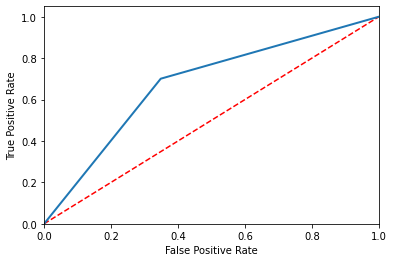

0.6761172348131643

In [24]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_predict

cross_pred = cross_val_predict(model, X_train, y_train, cv=5)
fpr, tpr, thresholds = roc_curve(y_train, cross_pred)
plt.plot([0, 1], [0, 1], color="red", linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr, tpr, linewidth=2, label="Curva ROC")
plt.show()
roc_auc_score(y_train, cross_pred)

## 5.- Observaciones

<li>Con respecto a la carga y limpieza de datos, se observa que los datos no tienen valores nulos, están en su mayoría equilibrados y solamente se debe tomar en cuenta el convertir las variables categóricas a numéricas para su uso en los modelos a entrenar.</li>
<li>A partir del análisis exploratorio de datos nos permite darle un vistazo a la calidad de los datos, así como saber si podemos o no continuar con el proyecto, como resultado de este sabremos si pasaremos a la etapa de preprocesamiento de datos para poder aplicarlos a un modelo de machine learning.</li>
<li>Dentro del análisis estadístico de los valores numéricos, la correlación y sus gráficas, nos proveen información para ver cómo es que dichas variables se relacionan o si se afectan entre sí, esto es especialmente importante para validar o refutar las hipótesis que se han planteado.</li>
<li>Para la evaluación de los modelos, se utilizaron diferentes métricas, siendo en este caso Clasificador de bosque aleatorio (Random forest classifier) el que obtuvo los mejores resultados, después se aplicó cross-validation obteniendo las siguientes puntuaciones (scores): 0.64, 0.70, 0.68, 0.68 y 0.66, y su curva ROC se encuentra muy cercana a la diagonal, para entender que tan bueno es el modelo, idealmente para el caso de cross-validation los valores deberían ser 1 o muy cercanos y la curva ROC lo más cercana al punto izquierda-arriba de la grafica.</li>

## 6.- Conclusiones
<li>Como se comprobó no todas las variables brindan información sobre la permanencia/abandono del empleo.
<li>El modelo que se ha creado nos permite clasificar a los empleados para saber si alguno tiene alto riesgo de rotacion, solo se debe tomar en cuenta que tan bueno es el modelo al realizar dicha clasificación y saber que se puede obtener clasificaciones incorrectas (un empleado que cumple con todos los requisitos para abandonar su empleo pero que se mantiene en el).</li>
<li>Existen varias formas de medir el desempeño de un modelo de este tipo ya sea por su precisión, recall, su puntaje F1 y su matriz de confusión. Existe un método llamado validación cruzada (cross-validation) el cual permite evaluar la precisión de un modelo, este no se aplica a todos los modelos ya que por su forma de implementarse es costoso al igual que la curva ROC.</li>
<li>Se podría agregar mas variables para mejorar el comportamiento del modelo, en este caso variables como prestaciones, promoción, distancia al lugar de trabajo, ambiente laboral, posibilidad de trabajar desde casa, etc nos pueden proveer mayor información y pueden tener una relación más significativa con la permanencia.</li>
<li>Se podría generar un modelo el cual proporcione la probabilidad de que alguien permanezca o no en el empleo, en este caso se utilizaría un modelo de regresión, los cuales se utilizan para hacer predicciones.</li>
<li>Ya que las personas más jóvenes  y menos experimentadas tienden al abandono, se recomienda apoyar a dichas personas con capacitaciones ya que con esto mejorarían su nivel de experiencia y de esta forma incrementar la probabilidad de permanencia.</li>